In [125]:
import nbsetup
import numpy as np
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from helpers.entropy import int_entropy
from helpers.ergodic import ErgodicEnsemble

In [64]:
def get_obs(graph):
    observations = []
    for node in graph:
        observations.append(len(graph[node]))
    return observations

In [150]:
def get_graphs(p, ensembles, nodes):
    graphs = []
    for e in range(ensembles):
        g = nx.generators.random_graphs.erdos_renyi_graph(nodes, p)
        graphs.append(g)
    return graphs

In [303]:
def get_ergodic(p, ensembles, nodes, bin_max=False, bin_count=False):
    observations = []
    for g in get_graphs(p, ensembles, nodes):
        observations.append(get_obs(g))
    observations = np.array(observations)
    
    # use maximum bins (that is max connections which is nodes-1)
    if bin_max:
        bin_max = nodes - 1
    # otherwise use observations
    else:
        bin_max = observations.max()+1
    
    # as default use integar number of bins
    if not bin_count:
        bin_count = bin_max
    
    bins = np.linspace(0, bin_max, bin_count+1)
    ergodic = ErgodicEnsemble(observations, bins)
    return ergodic

In [275]:
class Storage(dict):
    def store(self, key, value):
        try:
            self[key].append(value)
        except KeyError:
            self[key] = [value]
    
    def np(self, key):
        return np.array(self[key])
    
    def norm(self, key):
        na = self.np(key)
        return na/na.max()
    
    def plot(self, ax=None, norm=True):
        for key in self.keys():
            data = self.norm(key) if norm else self[key]
            sns.lineplot(x=range(len(data)), y=data, label=key, ax=ax)
    
    def df(self):
        return pd.DataFrame(self)
            

In [321]:
def plot_metrics(step=0.01, ensembles=20, nodes=10, bin_max=False, bin_count=False):
    p = np.arange(step,1+step, step)
    data = Storage()
    for i in p:
        nbsetup.cp(i, ensembles, nodes)
        ee = get_ergodic(i, ensembles, nodes, bin_max, bin_count)
        
        #data.store('complexity', ee.complexity)
        data.store('divergence', ee.complexity*ee.ergodic)
        #data.store('ergodic', ee.ergodic)
        #data.store('ensemble', ee.ensemble)
        data.store('p(1-p)', i*(1-i)*4)
        data.store('var', np.mean([np.var(o) for o in ee.observations]))
        #data.store('evar', np.var(ee.ergodic_observations)/25)
        
    # plot
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,5))
    data.plot(ax=axes[0], norm=False)
    data.plot(ax=axes[1])
        
    return data

In [ ]:
data = plot_metrics(0.001,1000,100)

0.782 1000 100


1.0 1000 100


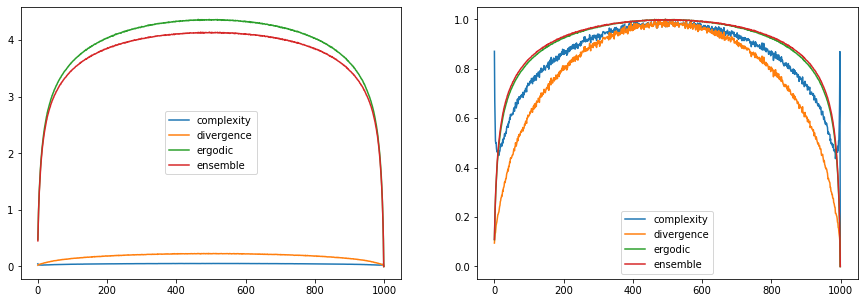

In [312]:
data = plot_metrics(0.001, 1000,100)

1.0 10 100


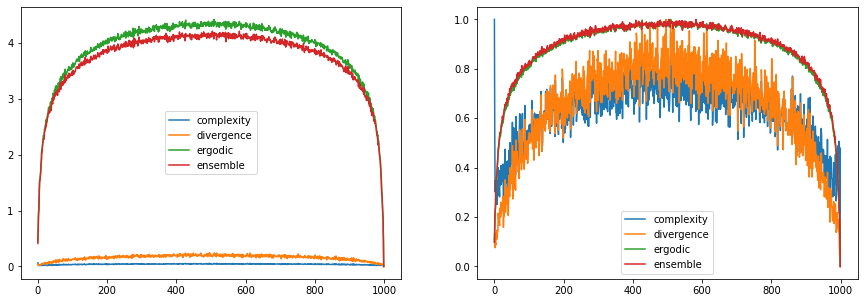

In [319]:
ndata = plot_metrics(0.001, 10, 100)

1.0 50 90


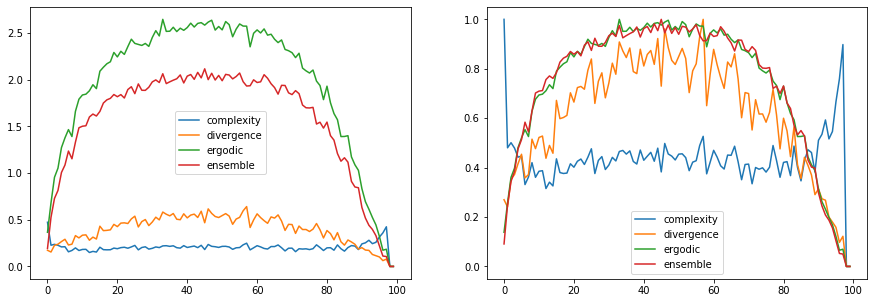

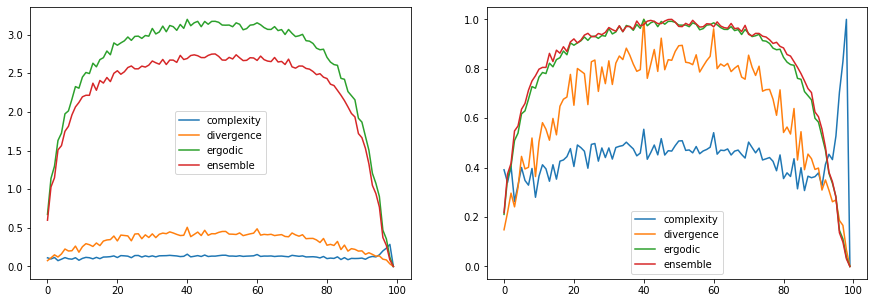

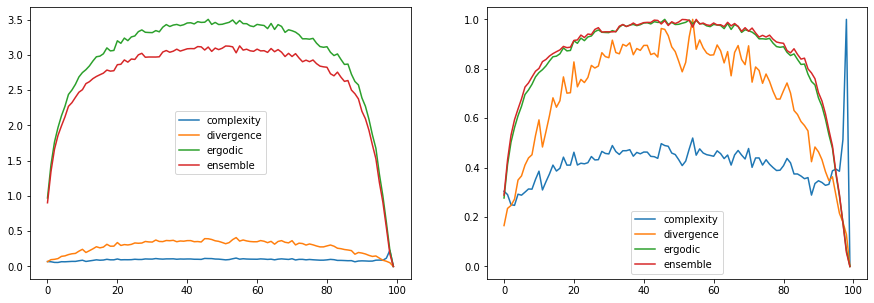

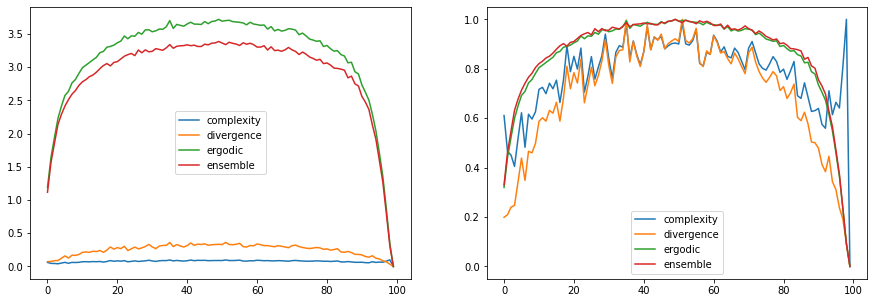

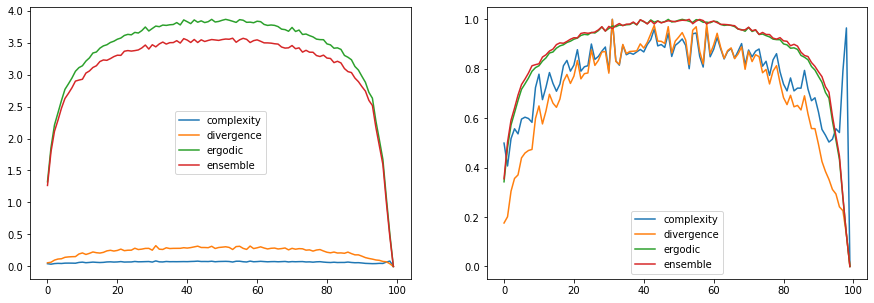

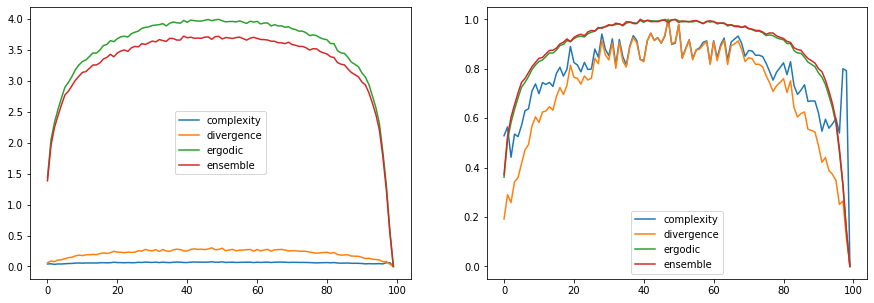

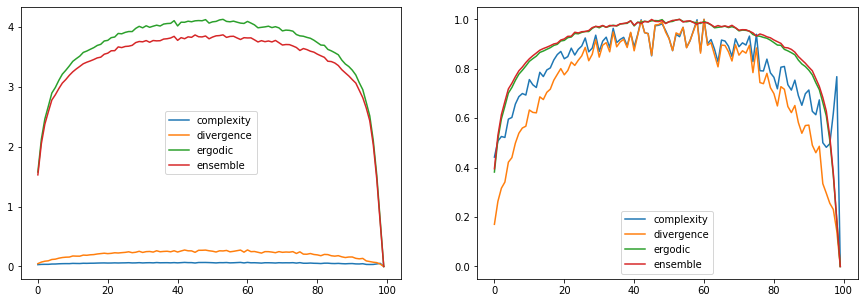

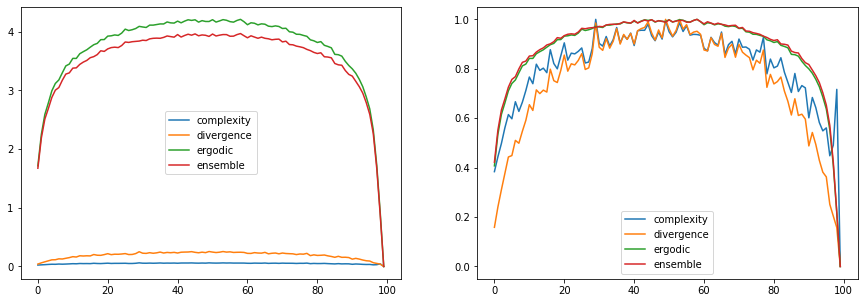

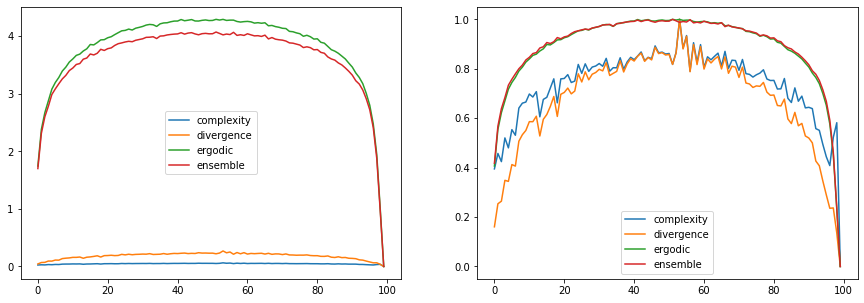

In [296]:
for nodes in range(10, 100, 10):
    print("nodes", nodes)
    plot_metrics(0.01, 50, nodes)

1.0 20 450


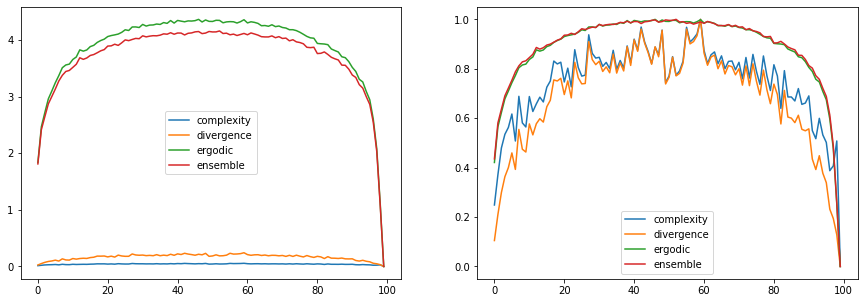

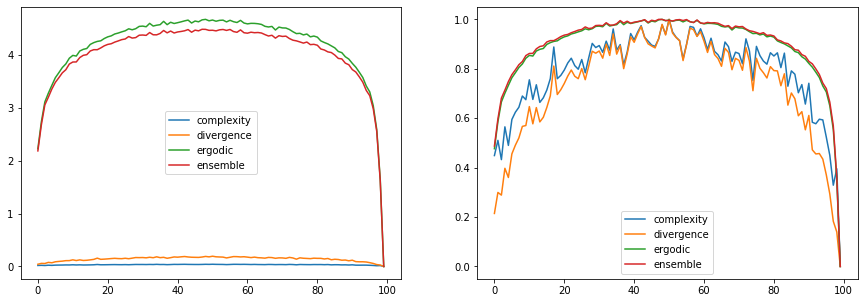

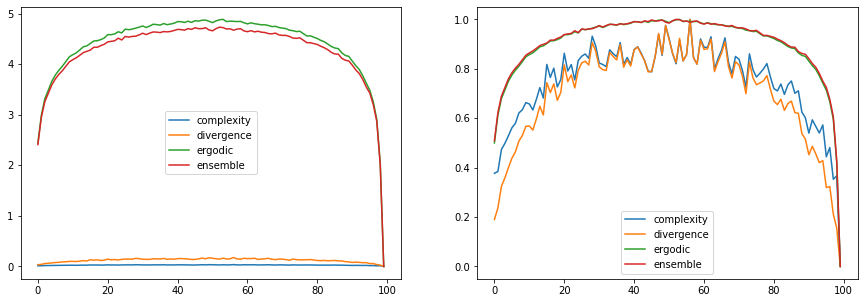

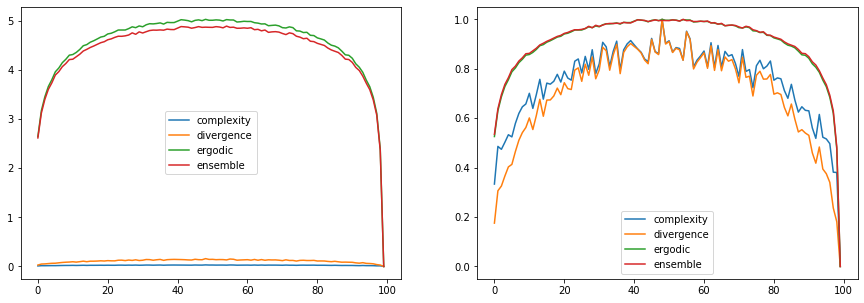

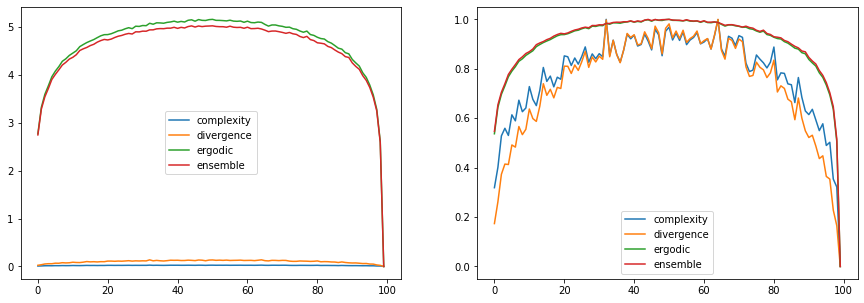

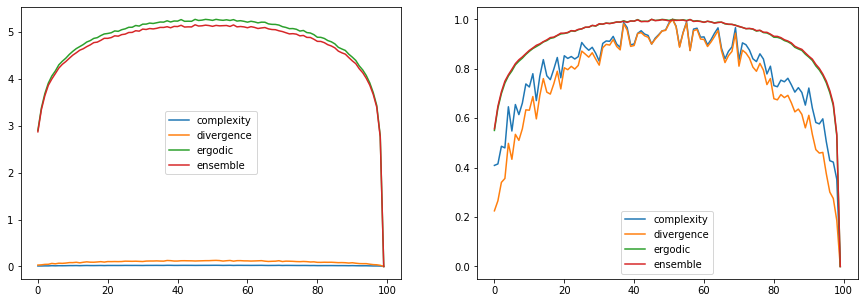

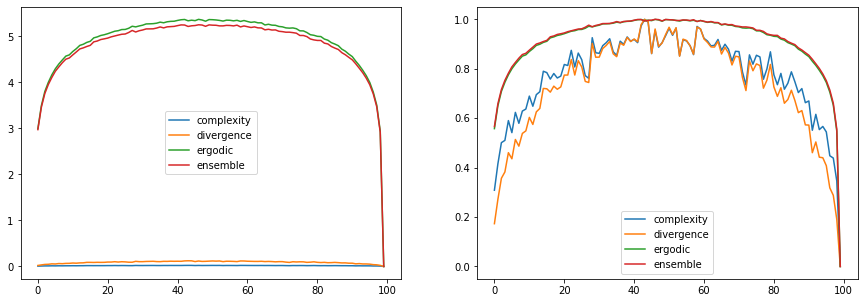

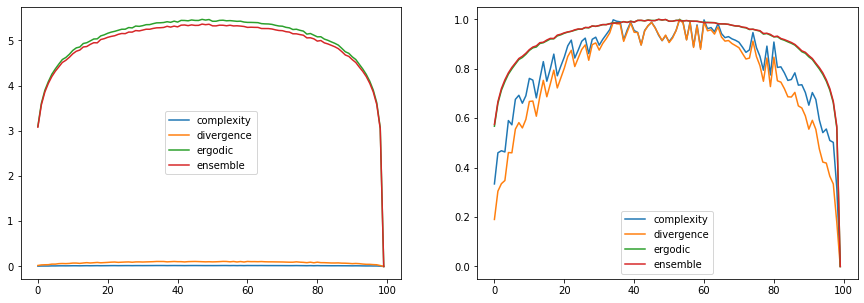

In [297]:
for nodes in range(100, 500, 50):
    plot_metrics(0.01, 20, nodes)

1.0 20 100


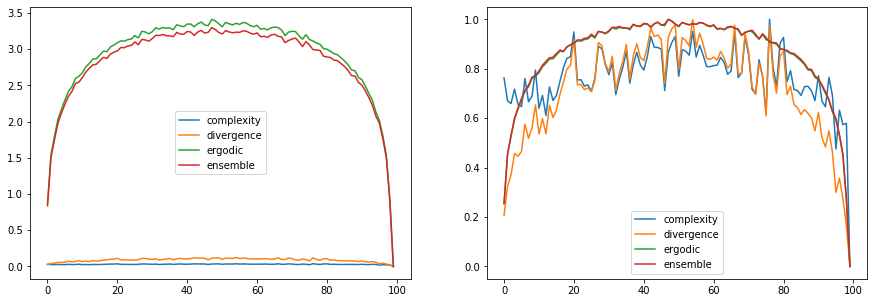

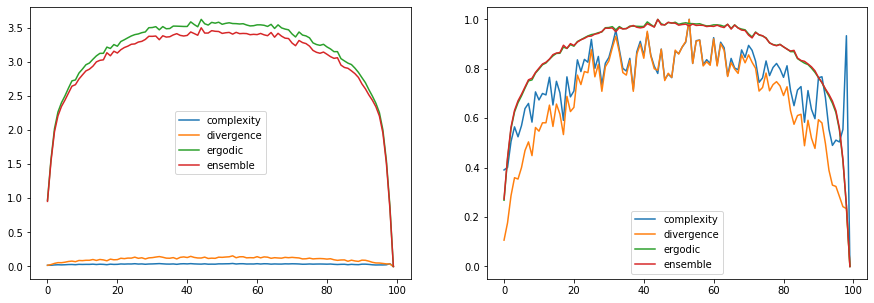

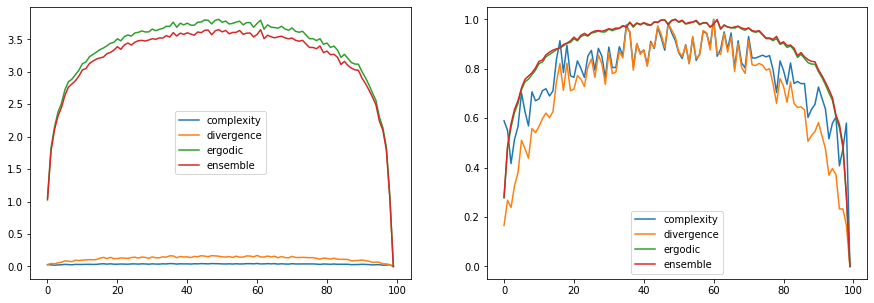

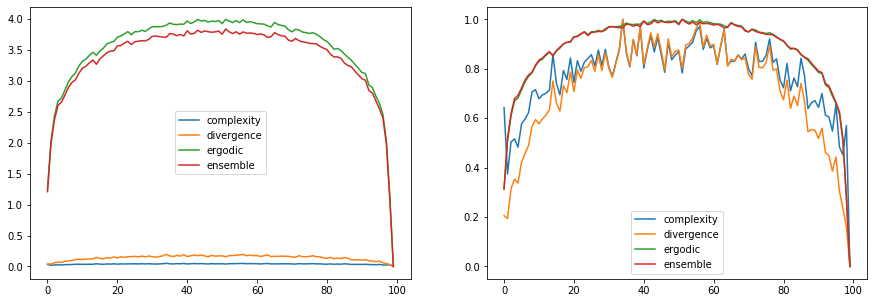

In [308]:
for bin_count in range(50, 90, 10):
    plot_metrics(0.01, 20, 100, True, bin_count)

1.0 20 100


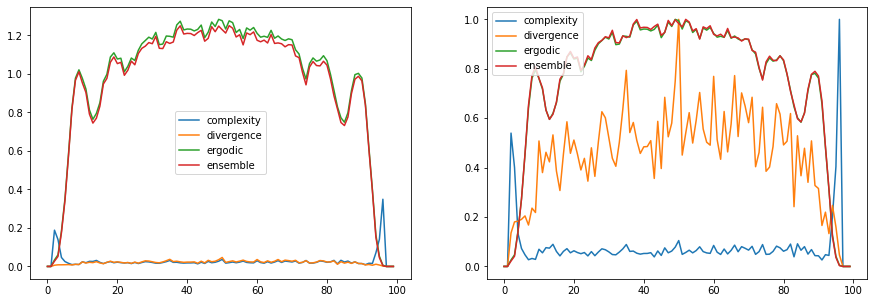

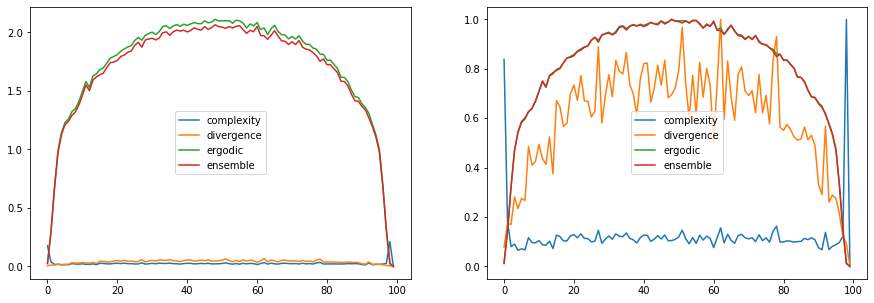

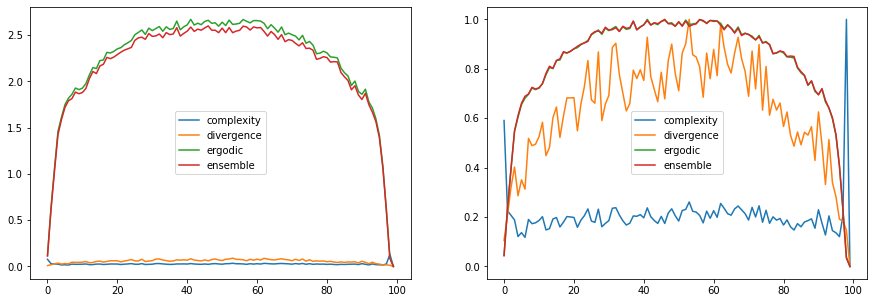

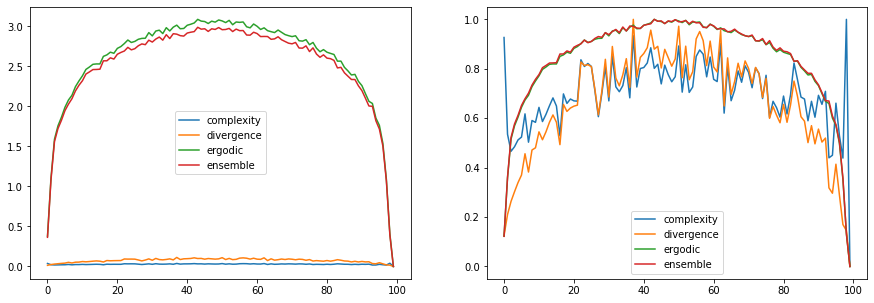

In [310]:
for bin_count in range(10, 50, 10):
    plot_metrics(0.01, 20, 100, True, bin_count)